In [1]:
import sys
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import os
import inspect
import pandas as pd

project_path = os.path.abspath( os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) + "/../" + "/../")
sys.path.insert(0, project_path)
print(project_path)

from DatabaseStorage.Program.Objects.Human import *
from DatabaseStorage.Program.Objects.Issue import *
from DatabaseStorage.Program.Objects.Machine import *
from DatabaseStorage.Program.Objects.MaintenanceWorkOrder import *
from DatabaseStorage.Program.Objects.Tag import *

from DatabaseStorage.Program.Database.Database_Properties import *
from DatabaseStorage.Program.Database.Database import *
from DatabaseStorage.Program.Database.Main import *

from DatabaseStorage.Program.KPI.KPI import *


from DatabaseStorage.Program.Others.MyDate import *

/Users/sam11/Git/ml-py


# DATABASE

## FILES

### NIST server

### Greystone

In [2]:
PassWord = 'GREYSTONE!!'
#file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'GreyStone_Data.csv')
file = os.path.join(project_path ,'DatabaseStorage', 'Data_CSV', 'GS_tokenized.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 15,
                NodeHuman.VALUE_OPERATOR.value: 13,

                NodeTag.VALUE_ITEM.value: 17,
                NodeTag.VALUE_PROBLEM.value: 19,
                NodeTag.VALUE_SOLUTION.value: 20,
                NodeTag.VALUE_NA.value: 18,
                NodeTag.VALUE_UNKNOWN.value: 21,
                NodeTag.VALUE_STOP_WORDS.value: 22,

                NodeMachine.VALUE_MACHINE.value: 7,
                NodeIssue.VALUE_MACHINE_DOWN.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 0,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 1,
                NodeIssue.VALUE_PART_PROCESS.value: 16,
                
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value: 9,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_ISSUE.value + "2": 10,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value: 11,
                NodeIssue.VALUE_DATE_MAINTENANCE_WORK_ORDER_CLOSE.value + "2": 12
                }

def date_cleanizer(date, time="0000"):
    """
    clean the date from GS data

    :param date: the date
    :param time: the time
    :return: a DateTime
    """

####    DATE ####
    if date is "":
        return None

    date = date.replace(" ","").split("/")

    date[2] = "20" + date[2]

    if len(date[0]) is 1:
        date[0] = "0" + date[0]
    else:
        date[0] = date[0]

    if len(date[1]) is 1:
        date[1] = "0" + date[1]
    else:
        date[1] = date[1]

#### TIME ####
    while len(time) < 4:
        time = "0" + time.replace(" ", "")

    return datetime(year=int(date[2]), month=int(date[0]), day=int(date[1]), hour=int(time[:2]), minute=int(time[2:]))

### Psu

In [ ]:
PassWord = 'PSU!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Psu_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 18,

                NodeMachine.VALUE_MACHINE.value: 3,
                NodeMachine.VALUE_TYPE.value:6,
                NodeMachine.VALUE_MANUFACTURER.value:5,
                NodeMachine.VALUE_LOCASION.value:4,


                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 11,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 19,
                NodeIssue.VALUE_DESCRIPTION_CAUSE.value:12,
                NodeIssue.VALUE_MACHINE_DOWN.value: 13,
                }

### Hvac

In [ ]:
PassWord = 'HVAC!!'
file = os.path.join(project_path, 'DatabaseStorage' , 'Data_CSV', 'Hvac_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 10,
                NodeHuman.VALUE_OPERATOR.value: 43,

                NodeMachine.VALUE_MACHINE.value: 7,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 247,
                }
date_cleanizer = None

### Auto

In [ ]:
PassWord = 'AUTO!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Auto_Data.csv')
localization = {NodeHuman.VALUE_TECHNICIAN.value: 4,
                NodeHuman.VALUE_OPERATOR.value: 11,
                NodeHuman.VALUE_CRAFTS.value: 16,
                NodeHuman.VALUE_SKILLS.value: 17,

                NodeMachine.VALUE_MACHINE.value: 8,

                NodeIssue.VALUE_DESCRIPTION_PROBLEM.value: 5,
                NodeIssue.VALUE_DESCRIPTION_SOLUTION.value: 7,
                }

### Mine

In [ ]:
PassWord = 'MINE!!'
file = os.path.join(project_path, 'DatabaseStorage', 'Data_CSV', 'Mine_Data.csv')

localization = {}

## ACTION

### Connect

In [3]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", PassWord)

In [ ]:
database = DatabaseNeo4J("bolt://127.0.0.1:7687", "neo4j", "11/Jul/2017!")

## Indexs

In [5]:
database.createIndexes()

1

In [4]:
database.dropIndexes()

1

## Data

In [7]:
graph_database_from_csv(database, file, localization, date_cleanizer)

100%|█████████▉| 3438/3448 [01:04<00:00, 53.54it/s]

3438 Maintenance Word Order Created


In [ ]:
# token_dataframe = pd.DataFrame.from_csv("GS_tokenized_forSascha.csv", index_col =None)
# graph_database_from_tag_extractor(database = database, token_dataframe = token_dataframe)

In [6]:
database.deleteData()

1

# KPI

# KPI using Object

In [17]:
tec = Technician(name=["h1","h2"])
ope = Operator(name=["_"])

i3=Issue(problem=["_"], solution=["_"], machine_down="_",date_maintenance_work_order_issue=["_"], date_maintenance_work_order_close=["_"],part_in_process=["_"] )
i=Issue(date_maintenance_work_order_issue=["_"])
mac = Machine(name=["_","h2", "h1"])

tagI = TagItem(keyword = ["_"])
tagS = TagAction(keyword = ["_"] , it_is="s")
tagP = TagAction(keyword = ["_"] , it_is="p")



In [18]:
objects = [i,mac]
query, results = cypher_from_kpi(objects)

In [61]:
dataframe, results = pandas_from_cypher_kpi(database, query, results)

59it [00:00, 62649.10it/s]

the query has been executed with succes


In [62]:
print(results)

['issue.date_maintenance_work_order_issue', 'machine.name', 'issue_count']


In [63]:
dataframe.head()

,issue.date_maintenance_work_order_issue,machine.name,issue_count
0,2015-10-23,h2,1
1,2015-12-17,h2,1
2,2016-01-20,h2,1
3,2015-04-01,h1,1
4,2015-09-23,h1,2


In [67]:
df = dataframe
df["issue.date_maintenance_work_order_issue"] = pd.DatetimeIndex(df["issue.date_maintenance_work_order_issue"])
print(type(df["issue.date_maintenance_work_order_issue"][0]))

<class 'pandas._libs.tslib.Timestamp'>


In [68]:
g=df.groupby(by=['machine.name',pd.Grouper(key='issue.date_maintenance_work_order_issue', freq="M")]).sum()
g=g.reset_index()
g.head()

,machine.name,issue.date_maintenance_work_order_issue,issue_count
0,h1,2015-04-30,3
1,h1,2015-06-30,1
2,h1,2015-09-30,6
3,h1,2015-11-30,3
4,h1,2015-12-31,4


/Users/sam11/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


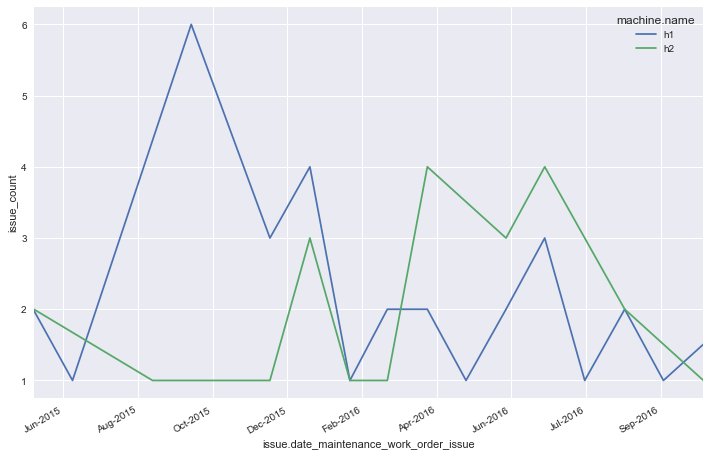

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl


sns.set(style="darkgrid")
fig =plt.figure(figsize=(12,8))

df=g.reset_index()

ax = sns.tsplot(data=df,
          time="issue.date_maintenance_work_order_issue",
          unit="machine.name",
          condition="machine.name",
          value="issue_count"
         )

def myFormatter(x, pos):
    return pd.to_datetime(x).strftime('%b-%Y')

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(myFormatter))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()


In [54]:
dataframe


,issue.date_maintenance_work_order_issue,machine.name,issue_count
0,2015-10-23 00:00:00,h2,1
1,2015-12-17 00:00:00,h2,1
2,2016-01-20 00:00:00,h2,1
3,2015-04-01 00:00:00,h1,1
4,2015-09-23 00:00:00,h1,2
5,2015-09-08 00:00:00,h1,1
6,2016-08-16 08:30:00,h2,1
7,2015-12-14 00:00:00,h1,1
8,2016-11-23 06:00:00,h1,1
9,2016-11-04 08:00:00,h1,1


In [59]:
y= dataframe[["machine.name", "issue_count"]]


In [60]:
y

,machine.name,issue_count
0,h2,1
1,h2,1
2,h2,1
3,h1,1
4,h1,2
5,h1,1
6,h2,1
7,h1,1
8,h1,1
9,h1,1
